In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = dataset_train.iloc[:,1:2].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled[:5]

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       [ 0.09156187],
       [ 0.07984225]])

In [8]:
# Creating dataset with 60 timesteps and one output combination
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [17]:
X_train

array([[ 0.08581368,  0.09701243,  0.09433366, ...,  0.07846566,
         0.08034452,  0.08497656],
       [ 0.09701243,  0.09433366,  0.09156187, ...,  0.08034452,
         0.08497656,  0.08627874],
       [ 0.09433366,  0.09156187,  0.07984225, ...,  0.08497656,
         0.08627874,  0.08471612],
       ..., 
       [ 0.92106928,  0.92438053,  0.93048218, ...,  0.95475854,
         0.95204256,  0.95163331],
       [ 0.92438053,  0.93048218,  0.9299055 , ...,  0.95204256,
         0.95163331,  0.95725128],
       [ 0.93048218,  0.9299055 ,  0.93113327, ...,  0.95163331,
         0.95725128,  0.93796041]])

In [18]:
y_train

array([ 0.08627874,  0.08471612,  0.07454052, ...,  0.95725128,
        0.93796041,  0.93688146])

In [19]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [23]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout

In [24]:
regressor = Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [25]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 25s - loss: 0.0454    
Epoch 2/100
1198/1198 [==============================] - 17s - loss: 0.0055    
Epoch 3/100
1198/1198 [==============================] - 15s - loss: 0.0048    
Epoch 4/100
1198/1198 [==============================] - 14s - loss: 0.0045    
Epoch 5/100
1198/1198 [==============================] - 12s - loss: 0.0042    
Epoch 6/100
1198/1198 [==============================] - 11s - loss: 0.0042    
Epoch 7/100
1198/1198 [==============================] - 13s - loss: 0.0043    
Epoch 8/100
1198/1198 [==============================] - 12s - loss: 0.0040    
Epoch 9/100
1198/1198 [==============================] - 12s - loss: 0.0039    
Epoch 10/100
1198/1198 [==============================] - 12s - loss: 0.0040    
Epoch 11/100
1198/1198 [==============================] - 13s - loss: 0.0043    
Epoch 12/100
1198/1198 [==============================] - 13s - loss: 0.0038    
Epoch 13/100
1198/1198 [=============

In [26]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [27]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [28]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs

array([ 779.  ,  779.66,  777.71,  786.66,  783.76,  781.22,  781.65,
        779.8 ,  787.85,  798.24,  803.3 ,  795.  ,  804.9 ,  816.68,
        806.34,  801.  ,  808.35,  795.47,  782.89,  778.2 ,  767.25,
        750.66,  774.5 ,  783.4 ,  779.94,  791.17,  756.54,  755.6 ,
        746.97,  755.2 ,  766.92,  771.37,  762.61,  772.63,  767.73,
        764.26,  760.  ,  771.53,  770.07,  757.44,  744.59,  757.71,
        764.73,  761.  ,  772.48,  780.  ,  785.04,  793.9 ,  797.4 ,
        797.34,  800.4 ,  790.22,  796.76,  795.84,  792.36,  790.9 ,
        790.68,  793.7 ,  783.33,  782.75,  778.81,  788.36,  786.08,
        795.26,  806.4 ,  807.86,  805.  ,  807.14,  807.48,  807.08,
        805.81,  805.12,  806.91,  807.25,  822.3 ,  829.62,  837.81,
        834.71,  814.66,  796.86])

In [29]:
inputs.shape

(80,)

In [30]:
inputs = inputs.reshape(-1,1)

In [31]:
inputs = sc.transform(inputs)

In [32]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

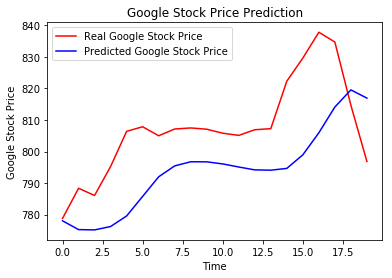

In [33]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()